https://www.youtube.com/watch?v=SEQbb8w7VTw : Simple Moving Average

- This program uses the **Dual Moving Average** crossover to determine when to buy and sell stock.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Loading Stocks data
AAPL = pd.read_csv("streaming_stocks_data.csv")
AAPL.columns = ['timestamp','last_price','volume','scrip_id']
AAPL.head()

,timestamp,last_price,volume,scrip_id
0,2020-08-03 09:16:00+05:30,100.65,74643,14
1,2020-08-03 09:17:00+05:30,100.60,58859,14
2,2020-08-03 09:18:00+05:30,100.65,30118,14
3,2020-08-03 09:19:00+05:30,100.60,49734,14
4,2020-08-03 09:20:00+05:30,100.30,33832,14


In [3]:
AAPL = AAPL.set_index(pd.DatetimeIndex(AAPL['timestamp'].values))
AAPL.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [4]:
AAPL.shape

(7497, 4)

In [6]:
AAPL1 = AAPL[0:374]
AAPL1.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [7]:
AAPL1.shape

(374, 4)

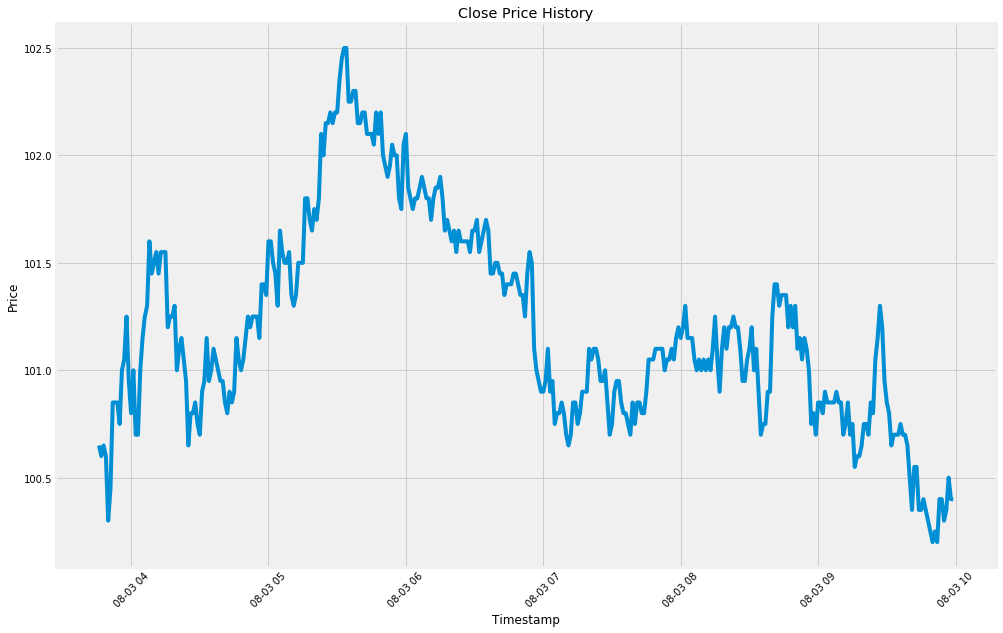

In [8]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(AAPL1['last_price'], label='Last Price')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Create the simple moving average with a 30 days window
SMA30 = pd.DataFrame()
SMA30['last_price'] = AAPL1['last_price'].rolling(window=30).mean()
SMA30

,last_price
2020-08-03 09:16:00+05:30,NaN
2020-08-03 09:17:00+05:30,NaN
2020-08-03 09:18:00+05:30,NaN
2020-08-03 09:19:00+05:30,NaN
2020-08-03 09:20:00+05:30,NaN
...,...
2020-08-03 15:25:00+05:30,100.583333
2020-08-03 15:26:00+05:30,100.556667
2020-08-03 15:27:00+05:30,100.530000
2020-08-03 15:28:00+05:30,100.503333


In [10]:
# Create the simple moving average with a 100 days window
SMA100 = pd.DataFrame()
SMA100['last_price'] = AAPL1['last_price'].rolling(window=100).mean()
SMA100

,last_price
2020-08-03 09:16:00+05:30,NaN
2020-08-03 09:17:00+05:30,NaN
2020-08-03 09:18:00+05:30,NaN
2020-08-03 09:19:00+05:30,NaN
2020-08-03 09:20:00+05:30,NaN
...,...
2020-08-03 15:25:00+05:30,100.859
2020-08-03 15:26:00+05:30,100.852
2020-08-03 15:27:00+05:30,100.848
2020-08-03 15:28:00+05:30,100.841


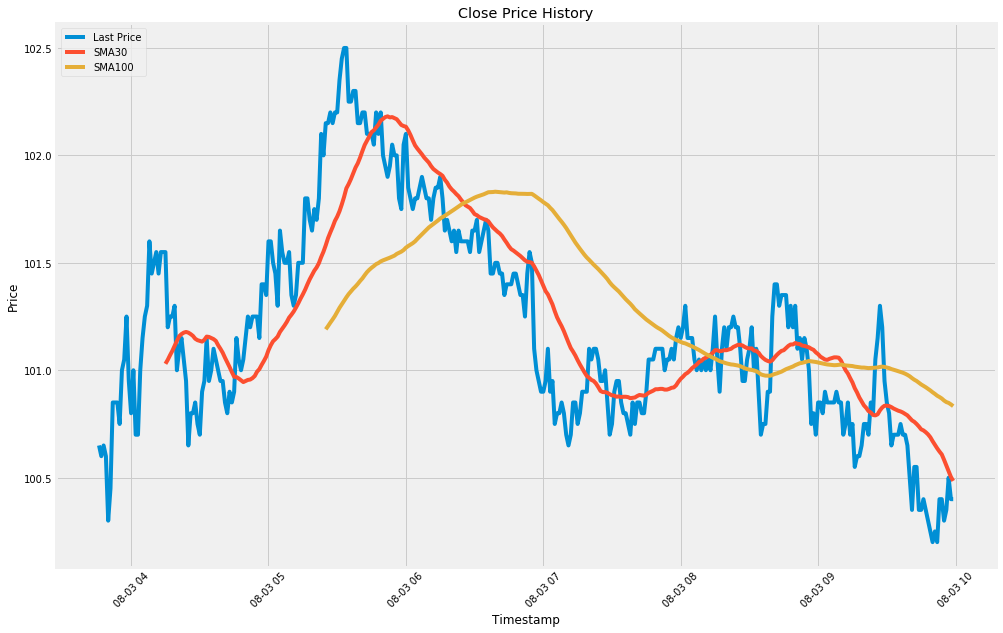

In [11]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(AAPL1['last_price'], label='Last Price')
plt.plot(SMA30['last_price'], label='SMA30')
plt.plot(SMA100['last_price'], label='SMA100')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [12]:
# Create a new Dataframe to store all the data
data = pd.DataFrame()
data['AAPL1'] = AAPL1['last_price']
data['SMA30'] = SMA30['last_price']
data['SMA100'] = SMA100['last_price']
data

,AAPL1,SMA30,SMA100
2020-08-03 09:16:00+05:30,100.65,NaN,NaN
2020-08-03 09:17:00+05:30,100.60,NaN,NaN
2020-08-03 09:18:00+05:30,100.65,NaN,NaN
2020-08-03 09:19:00+05:30,100.60,NaN,NaN
2020-08-03 09:20:00+05:30,100.30,NaN,NaN
...,...,...,...
2020-08-03 15:25:00+05:30,100.30,100.583333,100.859
2020-08-03 15:26:00+05:30,100.35,100.556667,100.852
2020-08-03 15:27:00+05:30,100.50,100.530000,100.848
2020-08-03 15:28:00+05:30,100.40,100.503333,100.841


In [13]:
# Create a function to signal when to buy and sell the asset / stock
def buy_sell(data):
    sigPriceBuy = []
    sigPricesell = []
    flag = -1
      
    for i in range(len(data)):
      if data['SMA30'][i] > data['SMA100'][i]:
        if flag !=1:
          sigPriceBuy.append(data['AAPL1'][i])
          sigPricesell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)
      elif data['SMA30'][i] < data['SMA100'][i]:
        if flag !=0:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(data['AAPL1'][i])
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)
      else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)

    return (sigPriceBuy, sigPricesell)

In [14]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [15]:
data

,AAPL1,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
2020-08-03 09:16:00+05:30,100.65,NaN,NaN,NaN,NaN
2020-08-03 09:17:00+05:30,100.60,NaN,NaN,NaN,NaN
2020-08-03 09:18:00+05:30,100.65,NaN,NaN,NaN,NaN
2020-08-03 09:19:00+05:30,100.60,NaN,NaN,NaN,NaN
2020-08-03 09:20:00+05:30,100.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-08-03 15:25:00+05:30,100.30,100.583333,100.859,NaN,NaN
2020-08-03 15:26:00+05:30,100.35,100.556667,100.852,NaN,NaN
2020-08-03 15:27:00+05:30,100.50,100.530000,100.848,NaN,NaN
2020-08-03 15:28:00+05:30,100.40,100.503333,100.841,NaN,NaN


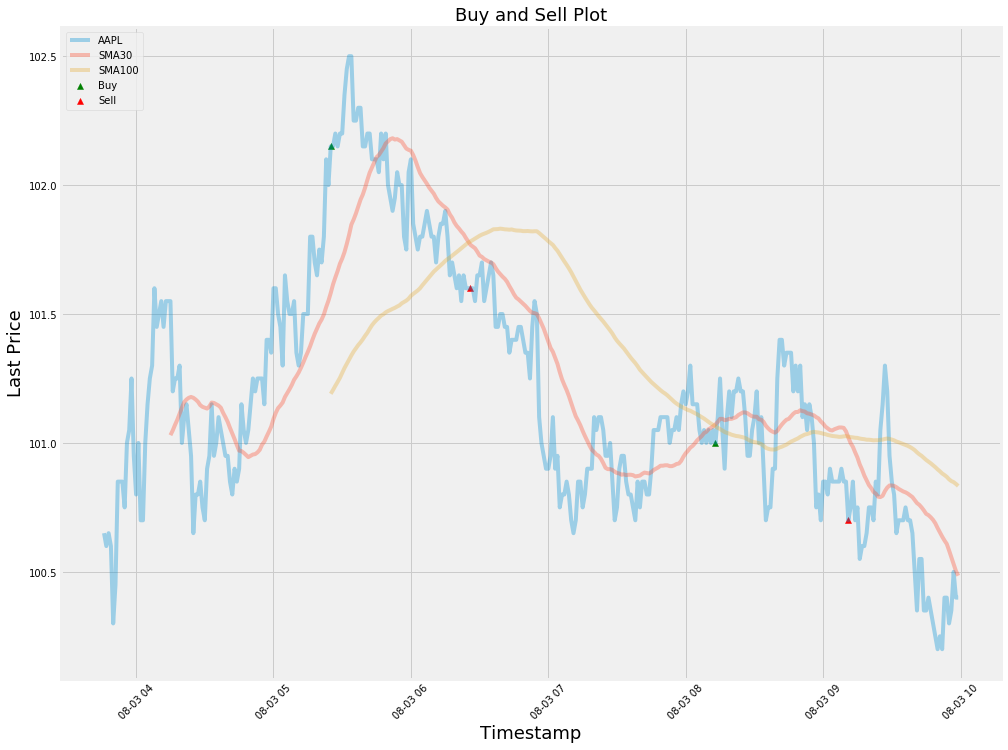

In [16]:
# Visualize the data and strategy to buy and sell the stock
plt.figure(figsize=(15,12))
plt.plot(data['AAPL1'], label='AAPL', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', color='green', marker='^', alpha=1)
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', color='red', marker='^', alpha=1)
plt.title('Buy and Sell Plot', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()